In [1]:
#importing libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import math as math
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.neural_network import MLPClassifier

In [2]:
#reading excle file
df = pd.read_excel('Mini_protein_data_Ha_for_ml_12_34.xlsx')

In [3]:
df

Category  Category_0_1  Category_12_34  Mono_total_score  Mono_AlaCount  \
0            4             1               1             -2.96           0.15   
1            1             0               0             -3.35           0.12   
2            4             1               1             -3.23           0.17   
3            2             0               0             -3.42           0.10   
4            3             1               1             -3.21           0.15   
...        ...           ...             ...               ...            ...   
3708         1             0               0             -3.56           0.21   
3709         2             0               0             -2.80           0.07   
3710         1             0               0             -3.78           0.09   
3711         3             1               1             -2.97           0.12   
3712         3             1               1             -2.93           0.12   

      Mono_bb  Mono_buried_minus_exposed  Mono_buried_np  \
0       -0.01                      72.47          117.39   
1       -0.01                      73.82          117.46   
2       -0.01                      72.85          117.21   
3       -0.01                      86.69          130.42   
4       -0.01                      77.07          118.47   
...       ...                        ...             ...   
3708     0.00                      75.47          117.12   
3709    -0.01                      72.43          115.38   
3710     0.00                      86.38          129.12   
3711    -0.01                      72.87          116.28   
3712    -0.01                      64.65          109.40   

      Mono_buried_over_exposed  Mono_cavity_volume  ...  Core_res_w  \
0                         0.07                0.38  ...           1   
1                         0.07                0.00  ...           1   
2                         0.07                0.19  ...           1   
3                         0.07                0.00  ...           2   
4                         0.07                0.17  ...           0   
...                        ...                 ...  ...         ...   
3708                      0.07                0.08  ...           0   
3709                      0.07                0.00  ...           0   
3710                      0.07                0.16  ...           0   
3711                      0.07                0.09  ...           0   
3712                      0.06                0.00  ...           1   

      Core_res_I  Core_total  Positive_charge_H  Positive_charge_K  \
0              3          11                  2                  4   
1              4          11                  2                  5   
2              2           8                  1                  4   
3              2           9                  0                  8   
4              3           9                  1                  5   
...          ...         ...                ...                ...   
3708           5          13                  0                  3   
3709           3          10                  0                  3   
3710           8          19                  0                  6   
3711           3          10                  2                  2   
3712           3           9                  0                  1   

      Positive_charge_R  Positive_total  Negative_charge_D  Negative_charge_E  \
0                     2               8                  0                  5   
1                     1               8                  1                  3   
2                     1               6                  0                  4   
3                     0               8                  1                  1   
4                     0               6                  1                  4   
...                 ...             ...                ...                ...   
3708                  2               5            

In [5]:
#Seperating data [Features,Lables]
#tranforming data [Lable encoder and Robust Scaler; Feature selection; PCA Dimentional reduction]
X = df.drop(['Category','Category_0_1','Category_12_34'], axis = 1)
Y = df['Category_12_34']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y)
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
X = sfm.transform(X)
X.shape

(3713, 52)

In [6]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(45,45),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score
    from sklearn.metrics import average_precision_score
    average_precision_rand = average_precision_score(Y_Test, Y_hat)
    print('Average precision-recall score Random forest: {0:0.2f}'.format(
          average_precision_rand))
    ## Curve for Randdom forrest
    y_probas = trainedalgo.predict_proba(X_Test)
    ax = skplt.metrics.plot_precision_recall(Y_Test, y_probas,figsize=(45,45),text_fontsize=80,title_fontsize=150)
    plt.xlabel('Recall', fontsize=160)
    plt.ylabel('Precision', fontsize=160)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    for l in ax.lines:
        l.set_lw(25)
    plt.show()    
    from sklearn.metrics import precision_recall_fscore_support
    precision_recall_fscore_support(Y_Test, Y_hat)

In [7]:
#Data Spliting [Training and Test]
X_train, X_val, y_train, y_val = train_test_split(X, Y, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (2784, 52) (2784,)
Validation set: (929, 52) (929,)


In [8]:
#KNN Classifier Testing
for k in range (15):
    k = k+1
    #Train Model and Predict  
    neighbour = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_predict_KNN = neighbour.predict(X_val)
    print("Test set Accuracy for k = " ,k," : " , accuracy_score(y_val, y_predict_KNN))


Test set Accuracy for k =  1  :  0.604951560818084
Test set Accuracy for k =  2  :  0.6114101184068891
Test set Accuracy for k =  3  :  0.6243272335844995
Test set Accuracy for k =  4  :  0.6361679224973089
Test set Accuracy for k =  5  :  0.6512378902045209
Test set Accuracy for k =  6  :  0.6533907427341227
Test set Accuracy for k =  7  :  0.6749192680301399
Test set Accuracy for k =  8  :  0.6512378902045209
Test set Accuracy for k =  9  :  0.6641550053821313
Test set Accuracy for k =  10  :  0.6469321851453176
Test set Accuracy for k =  11  :  0.6630785791173305
Test set Accuracy for k =  12  :  0.667384284176534
Test set Accuracy for k =  13  :  0.6641550053821313
Test set Accuracy for k =  14  :  0.6652314316469322
Test set Accuracy for k =  15  :  0.6641550053821313


Test set Accuracy for k 7 =  0.6749192680301399
Confusion matrix, without normalization
[[320 169]
 [133 307]]
Normalized confusion matrix
[[0.65439673 0.34560327]
 [0.30227273 0.69772727]]


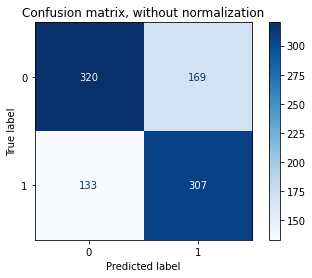

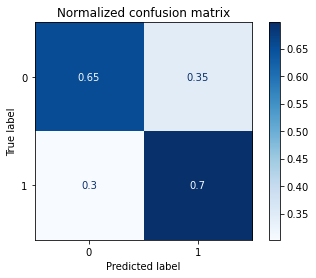

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       489
           1       0.64      0.70      0.67       440

    accuracy                           0.67       929
   macro avg       0.68      0.68      0.67       929
weighted avg       0.68      0.67      0.68       929



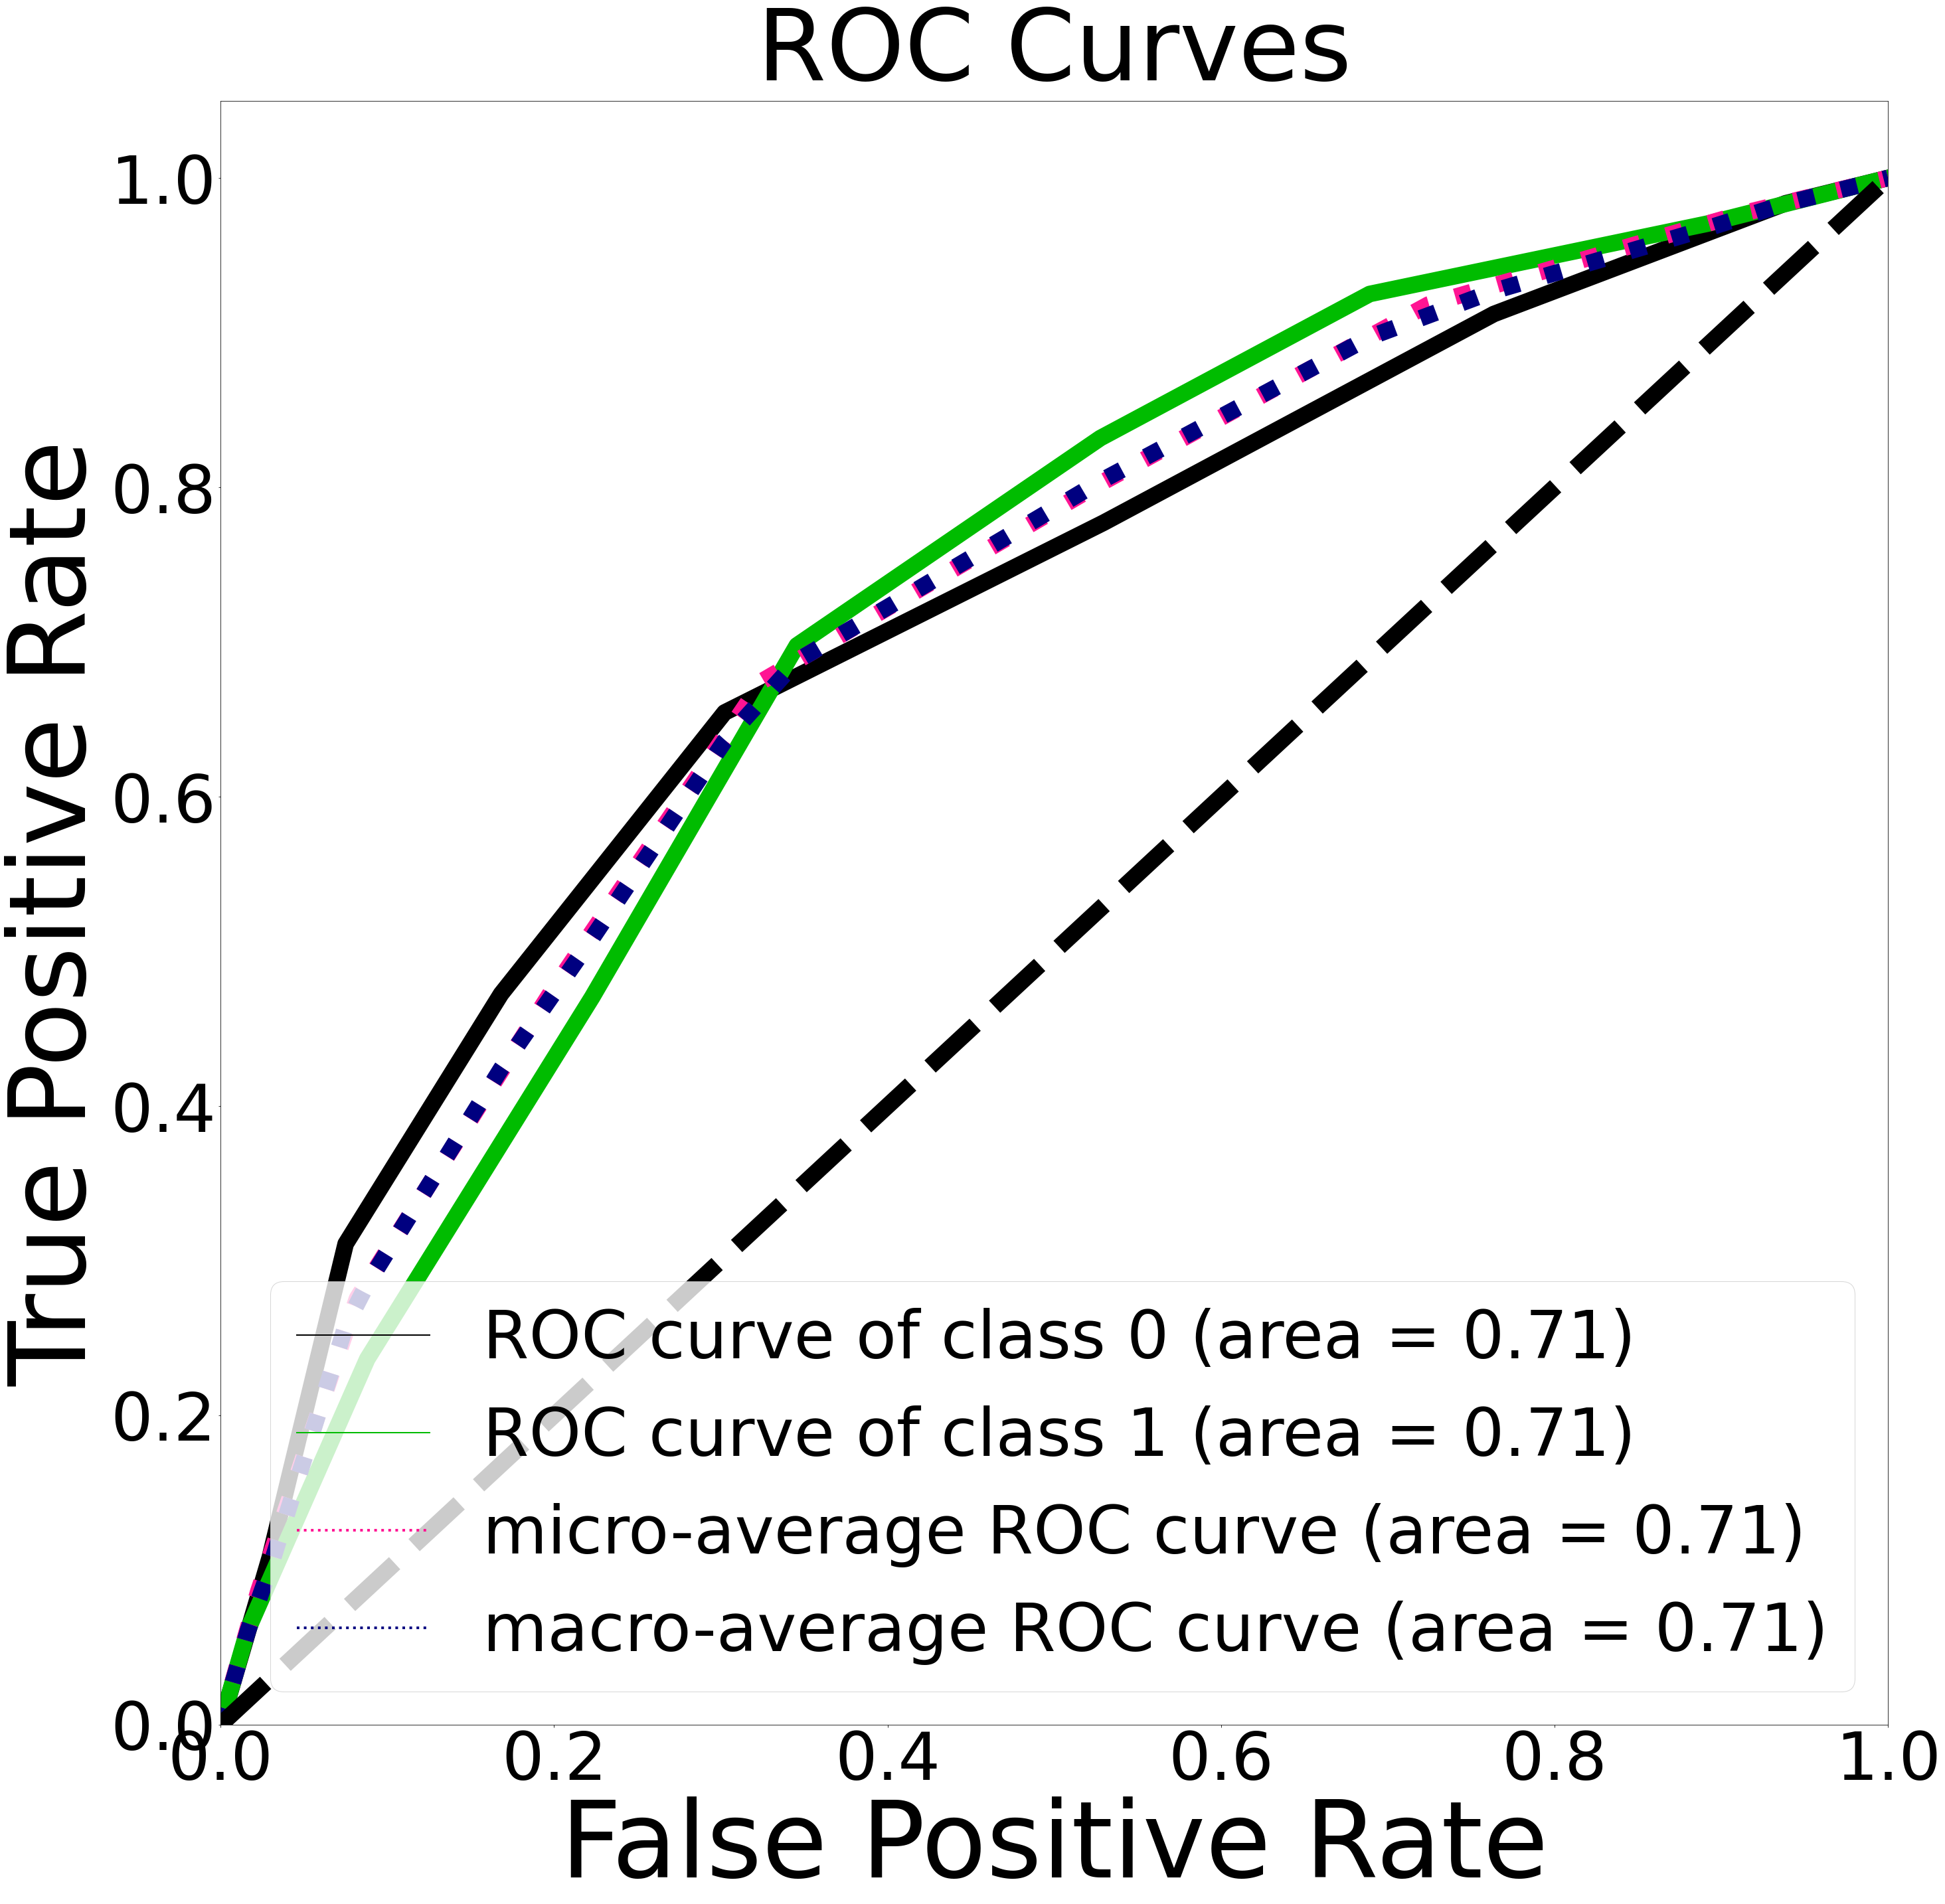

Average precision-recall score Random forest: 0.59


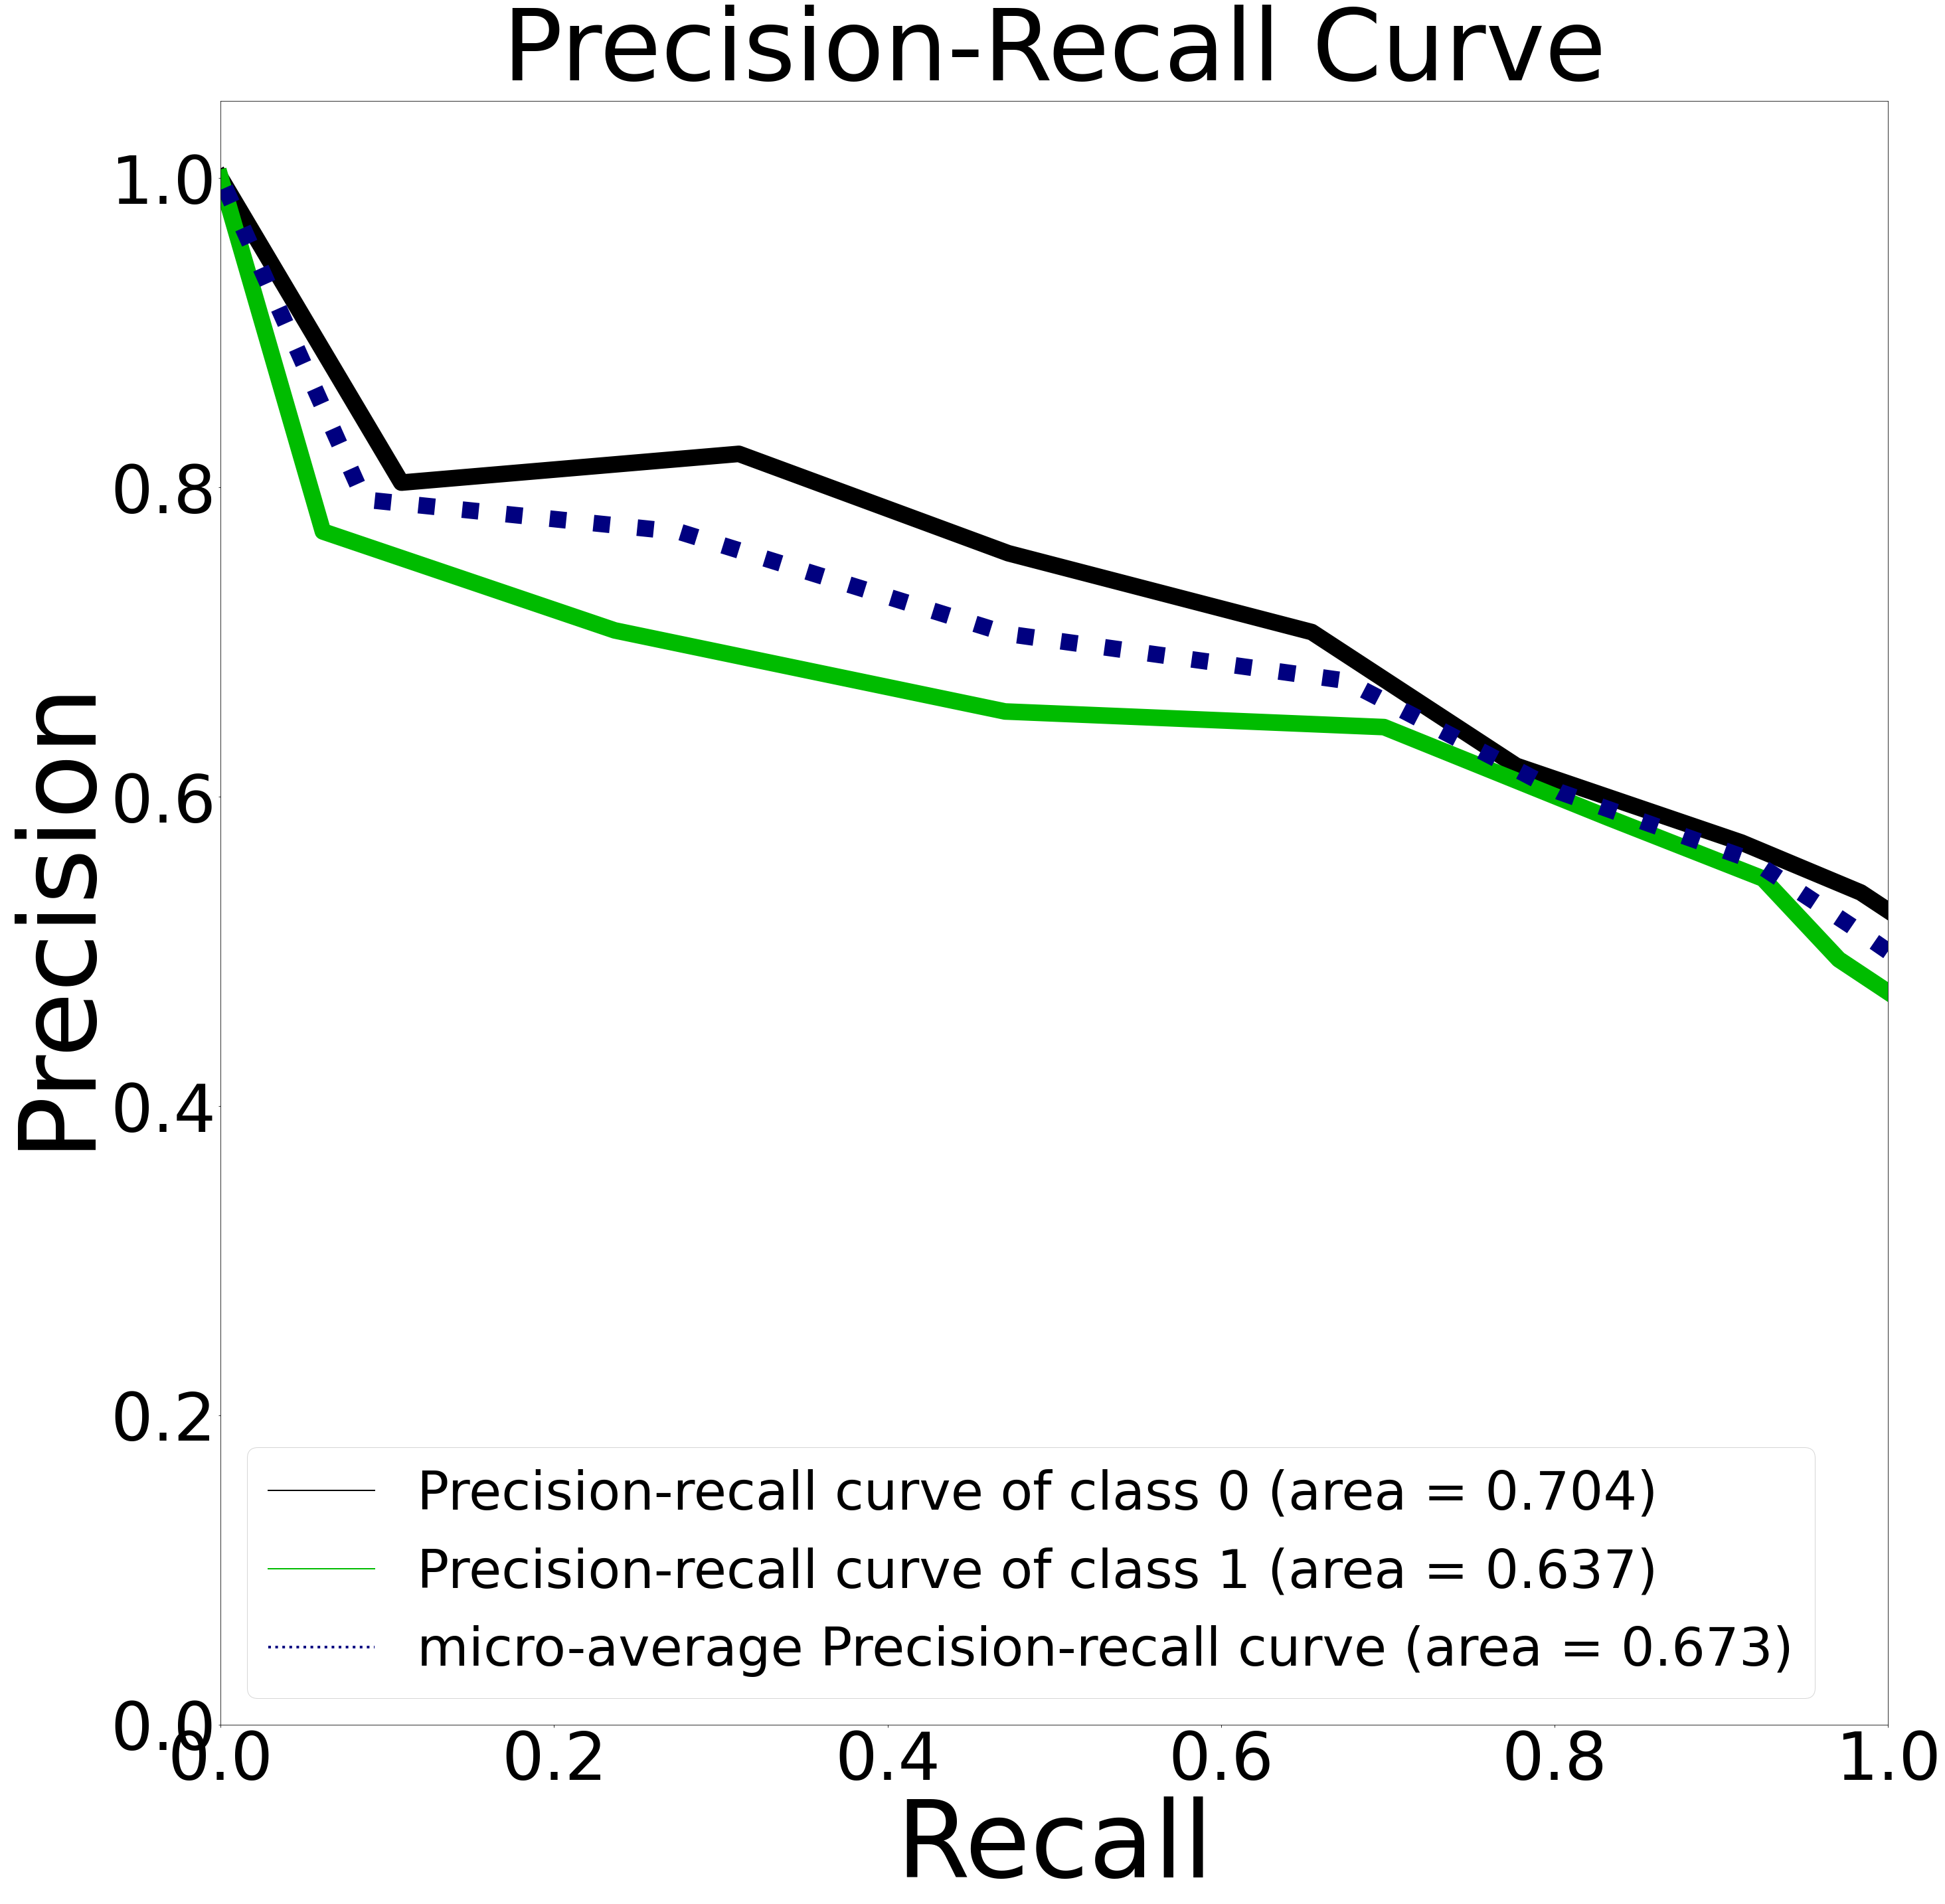

In [13]:
#KNN Classifier best cluster
neighbour = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
y_predict_KNN = neighbour.predict(X_val)
print("Test set Accuracy for k 7 = " , accuracy_score(y_val, y_predict_KNN))
plot_graphs(neighbour,X_val,y_val, y_predict_KNN)

In [9]:
#Random Forest Classifier Classifier Testing
md =0
while md < 1000:
    md = md+100
    championsTree = RandomForestClassifier(n_estimators = md)
    championsTree.fit(X_train,y_train)
    predict_tree = championsTree.predict(X_val)
    print("Random Forests's Accuracy for Tress = ", md , ":" , accuracy_score(y_val, predict_tree))

Random Forests's Accuracy for Tress =  100 : 0.6846071044133477
Random Forests's Accuracy for Tress =  200 : 0.7007534983853606
Random Forests's Accuracy for Tress =  300 : 0.6942949407965554
Random Forests's Accuracy for Tress =  400 : 0.6921420882669537
Random Forests's Accuracy for Tress =  500 : 0.6996770721205597
Random Forests's Accuracy for Tress =  600 : 0.6932185145317545
Random Forests's Accuracy for Tress =  700 : 0.6996770721205597
Random Forests's Accuracy for Tress =  800 : 0.7039827771797632
Random Forests's Accuracy for Tress =  900 : 0.6921420882669537
Random Forests's Accuracy for Tress =  1000 : 0.7072120559741658


Minimum value for Trees that improves results = 800
Confusion matrix, without normalization
[[351 138]
 [135 305]]
Normalized confusion matrix
[[0.71779141 0.28220859]
 [0.30681818 0.69318182]]


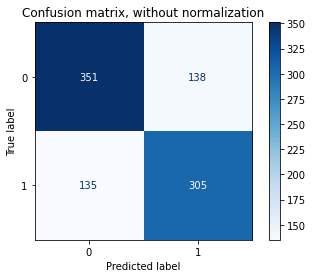

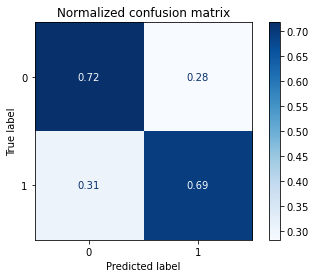

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       489
           1       0.69      0.69      0.69       440

    accuracy                           0.71       929
   macro avg       0.71      0.71      0.71       929
weighted avg       0.71      0.71      0.71       929



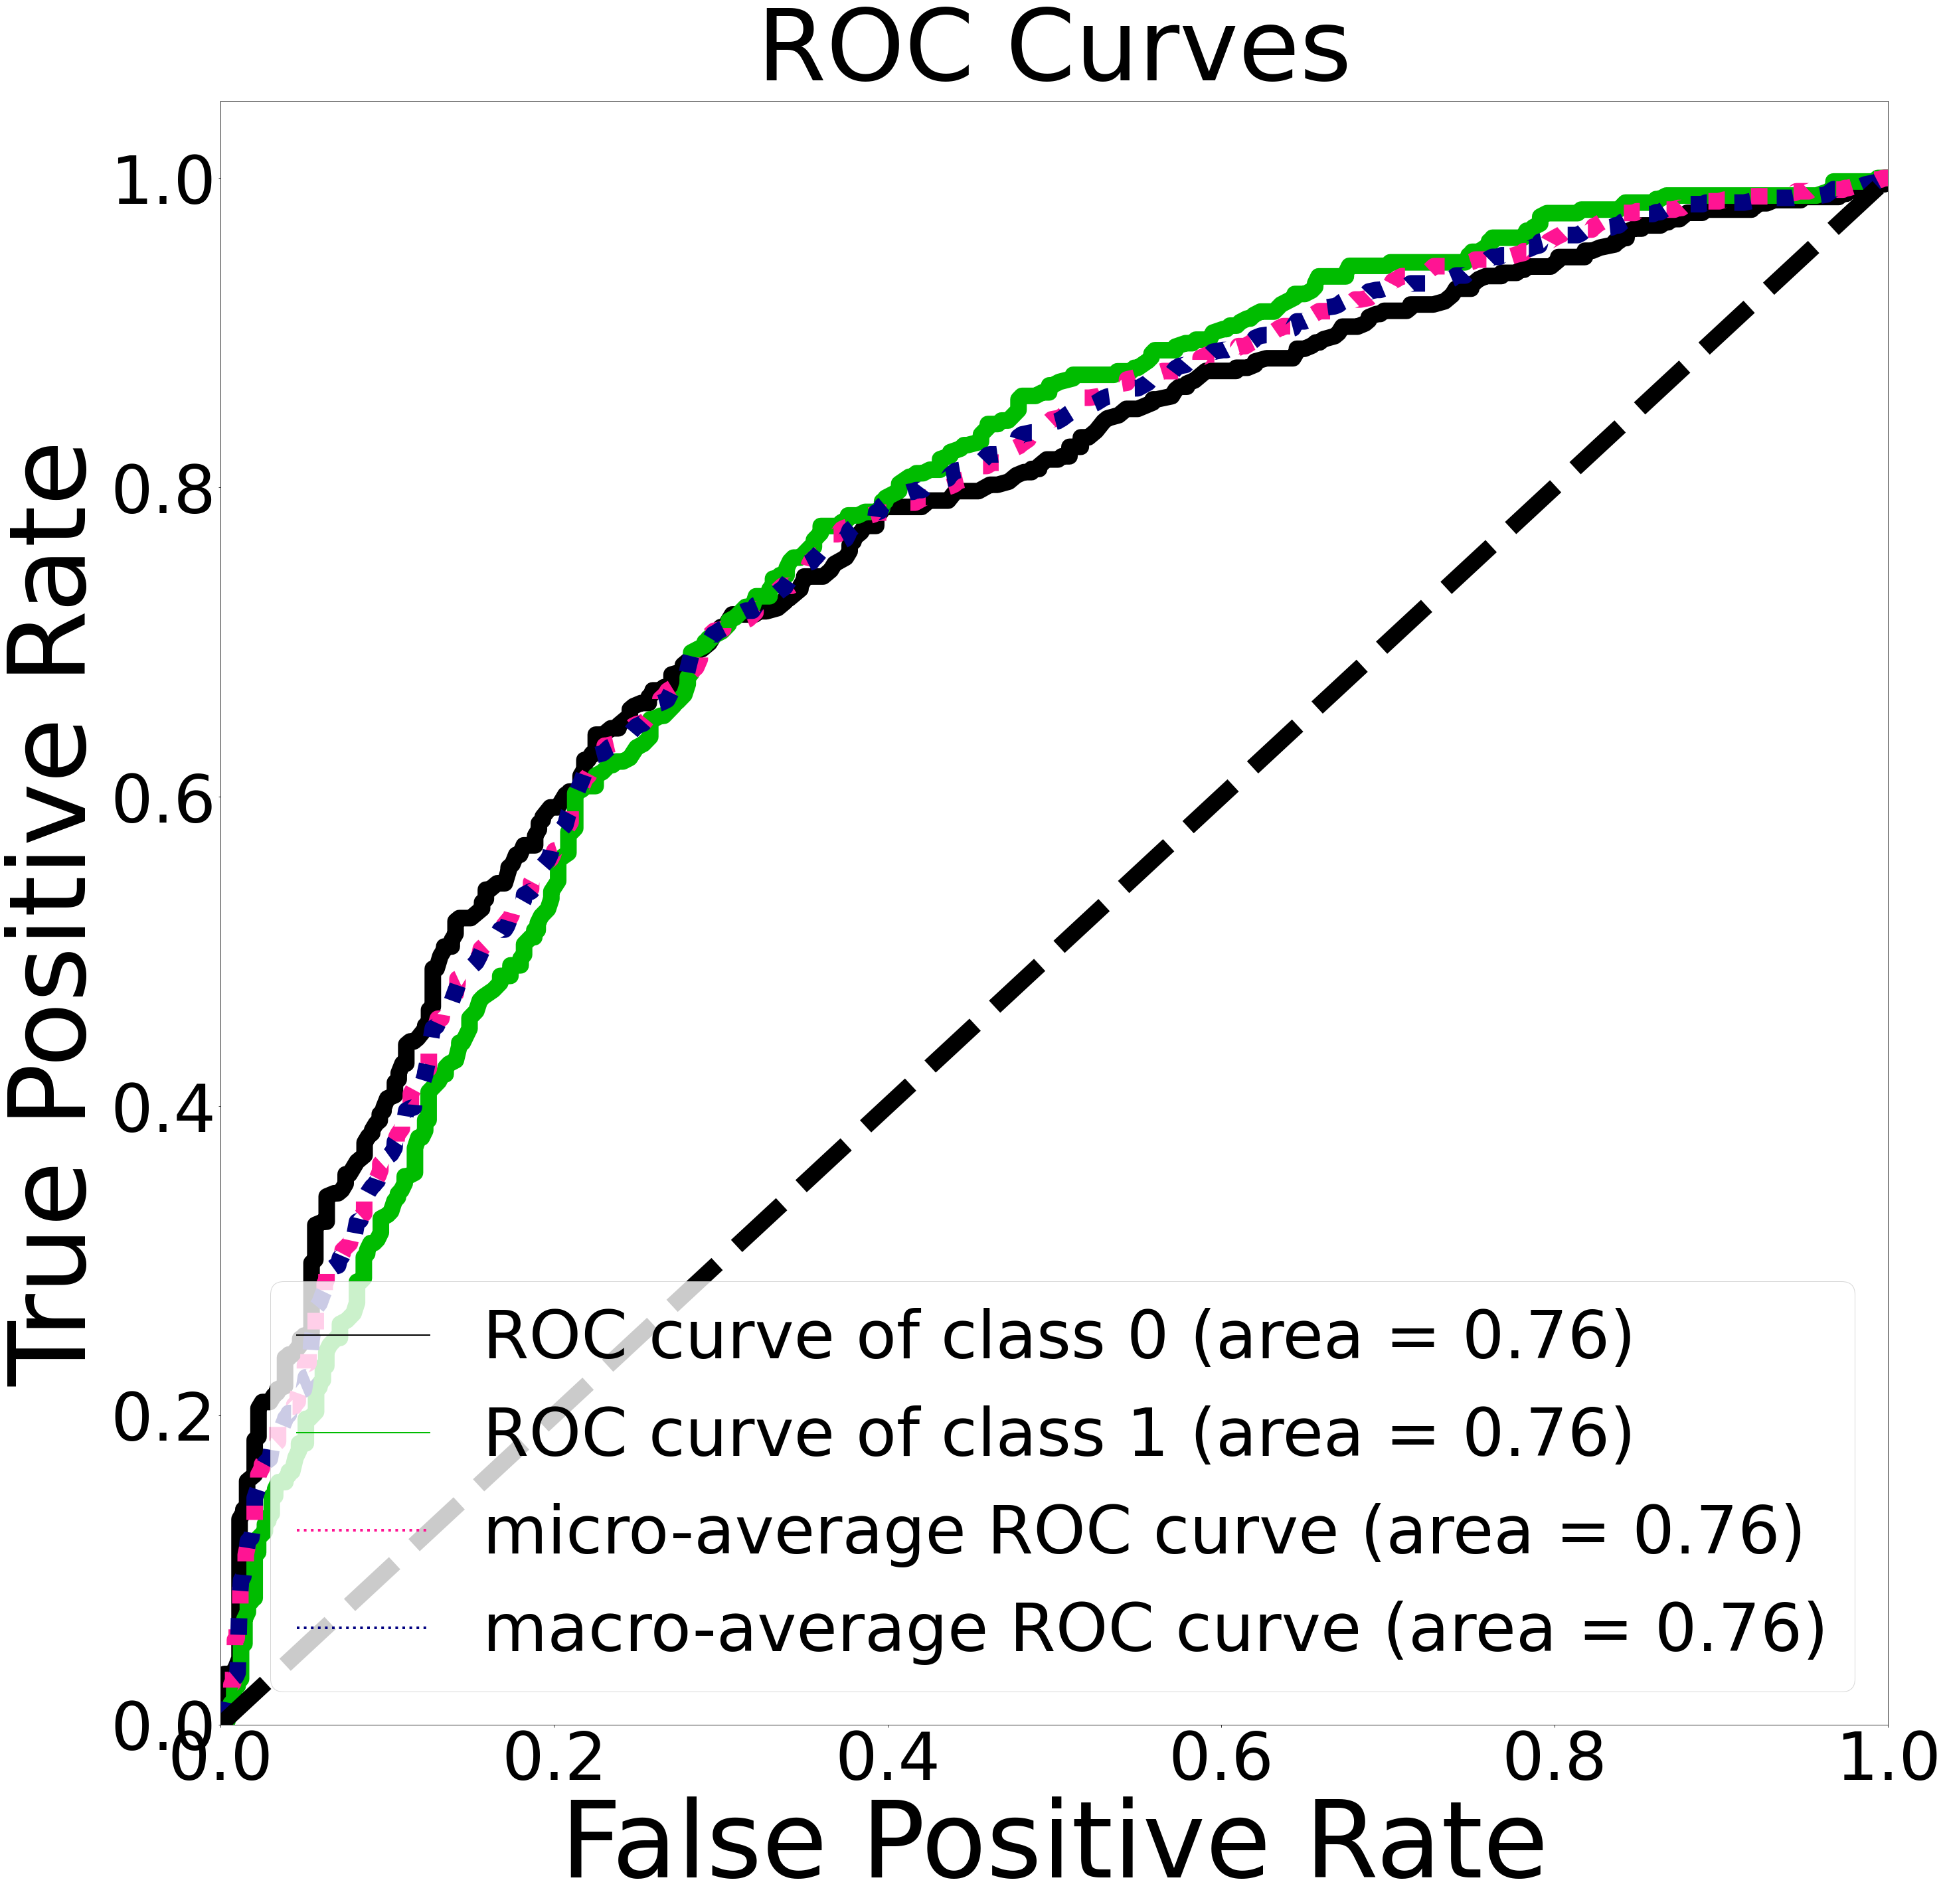

Average precision-recall score Random forest: 0.62


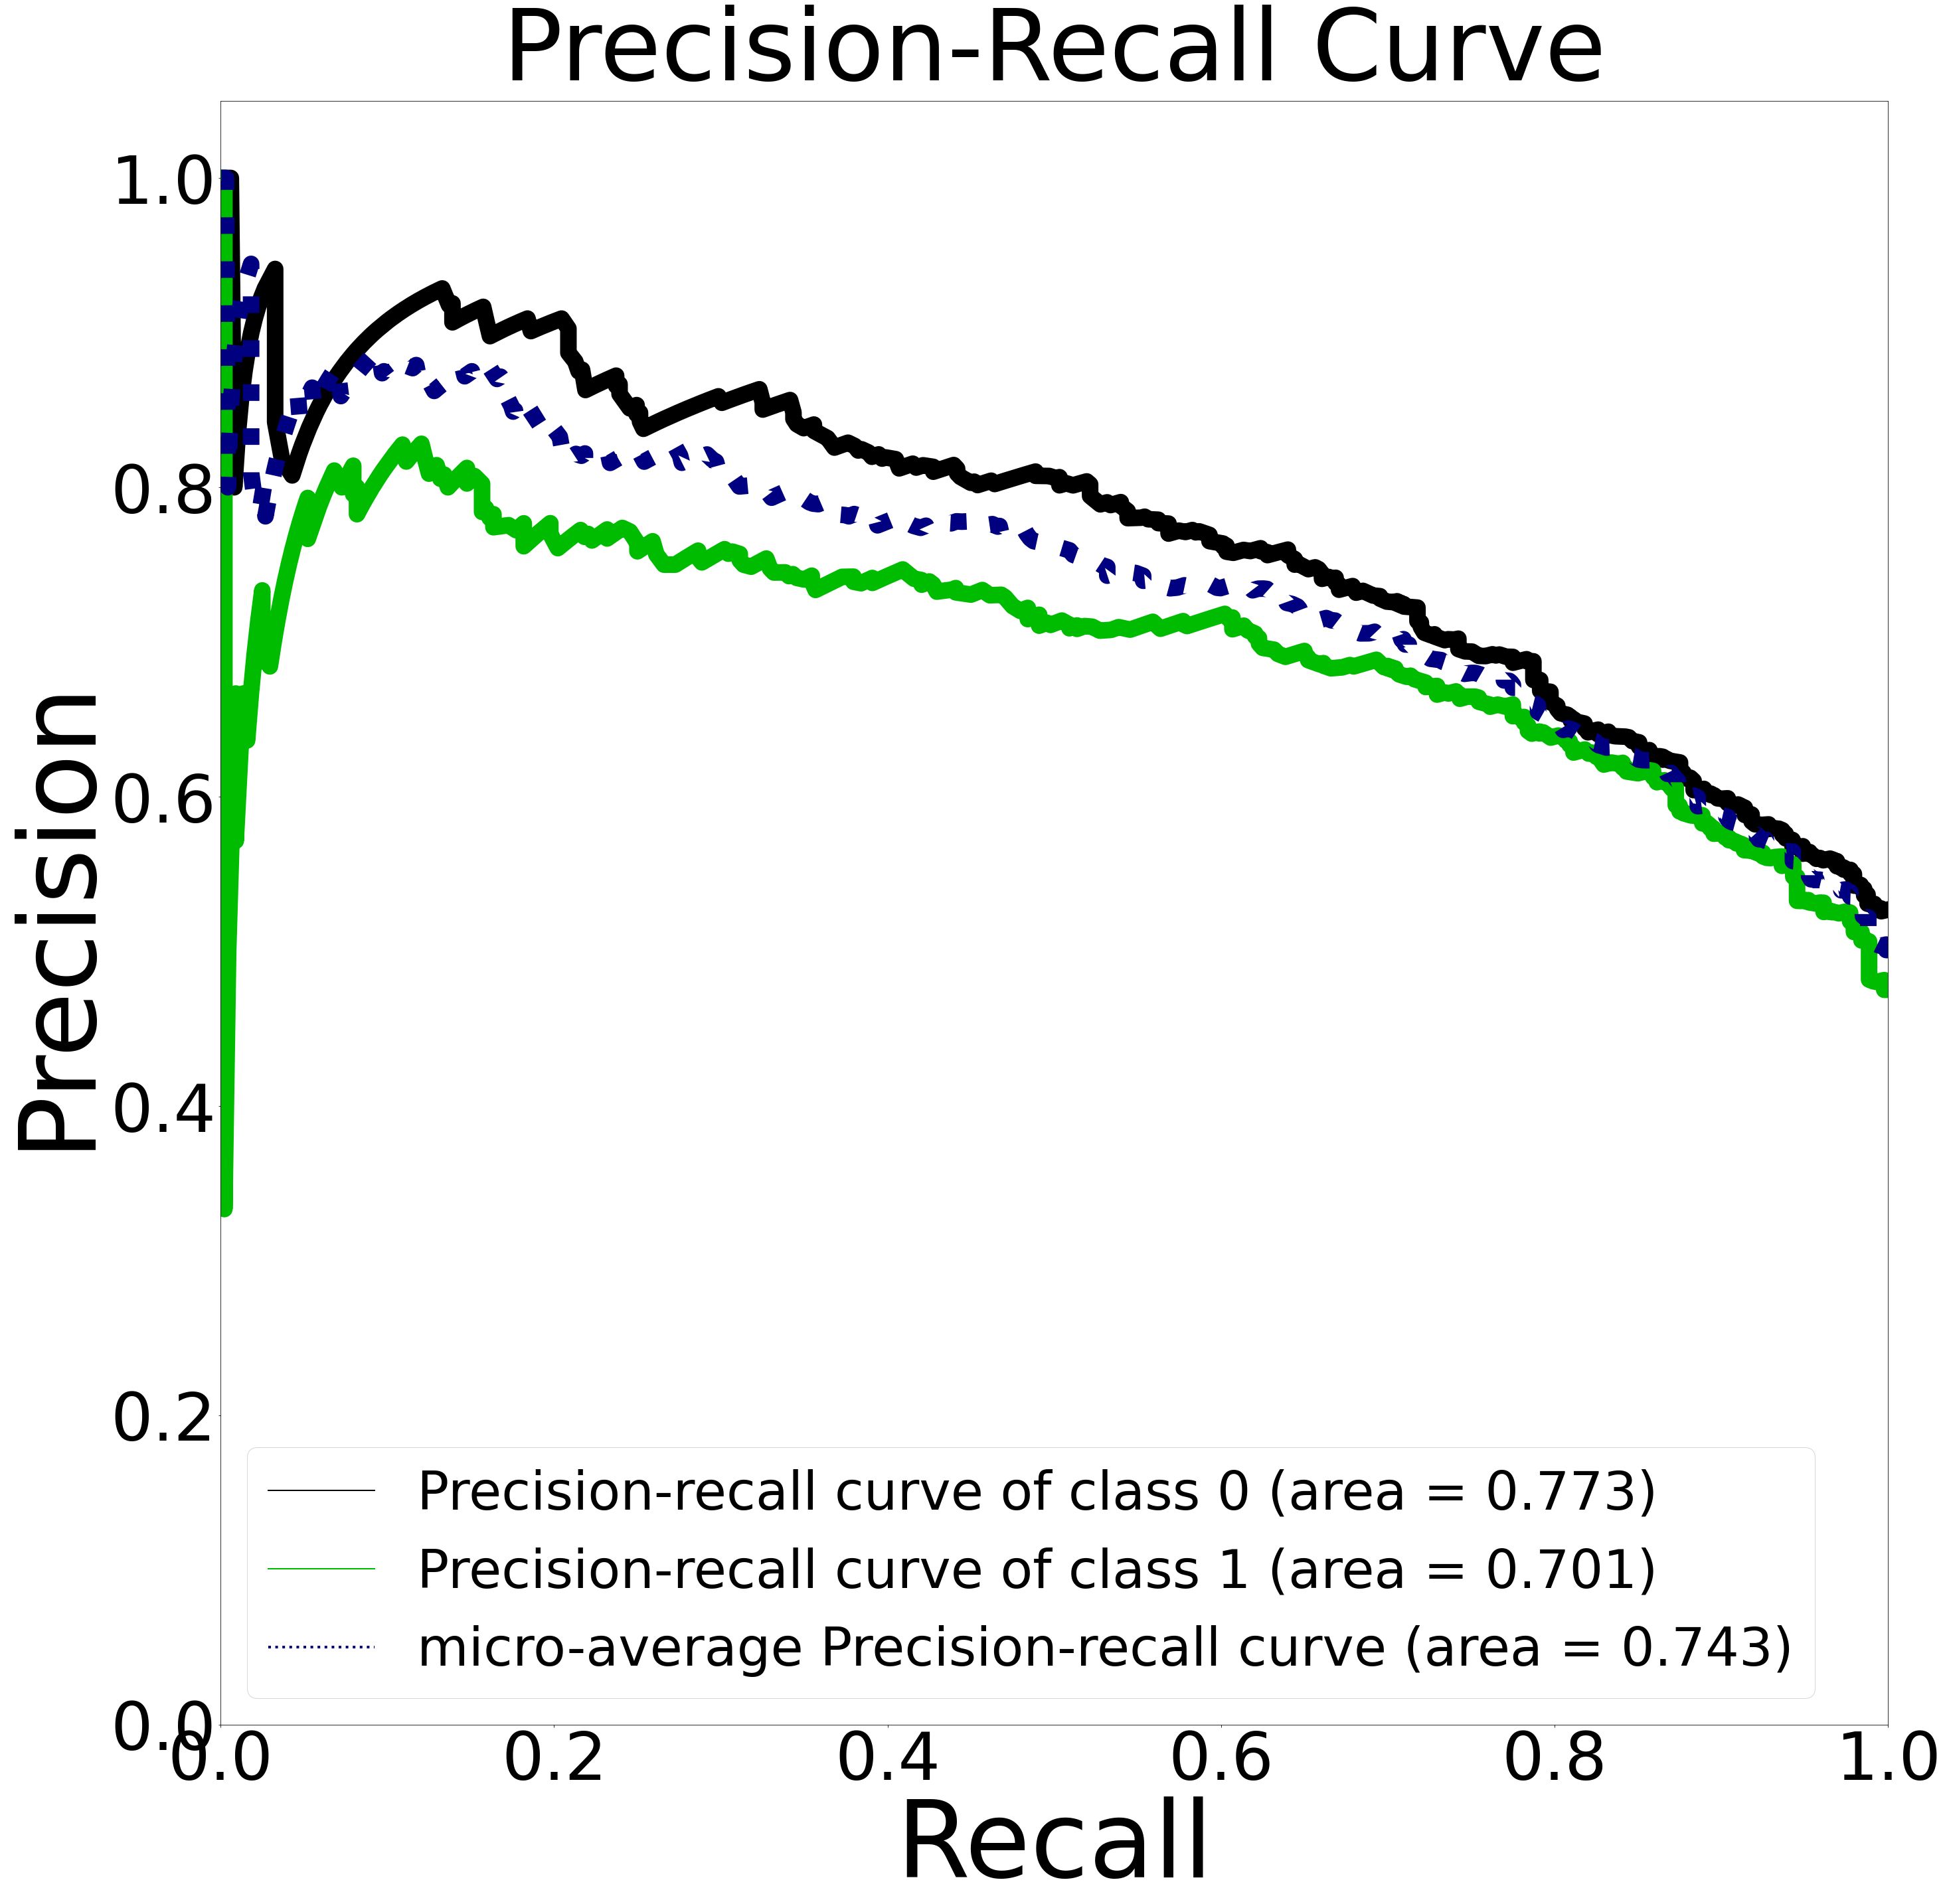

In [14]:
#Random Forest Classifier best Tree counts
print ("Minimum value for Trees that improves results = 800")
championsTree = RandomForestClassifier(n_estimators = 800)
championsTree.fit(X_train,y_train)
predict_tree = championsTree.predict(X_val)
plot_graphs(championsTree,X_val,y_val, predict_tree)

In [10]:
#Suport Vector Machine Testing
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Radial basis function:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Linear:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Polynomial:" , accuracy_score(y_val, y_svm))
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy for Sigmoid:" , accuracy_score(y_val, y_svm))

Support vector machine accuracy for Radial basis function: 0.7082884822389667
Support vector machine accuracy for Linear: 0.7039827771797632
Support vector machine accuracy for Polynomial: 0.6996770721205597
Support vector machine accuracy for Sigmoid: 0.6103336921420882


As best score provided with Radial we will train it in the same.
Support vector machine accuracy Best Kernel score : 0.7082884822389667
Confusion matrix, without normalization
[[314 175]
 [ 96 344]]
Normalized confusion matrix
[[0.64212679 0.35787321]
 [0.21818182 0.78181818]]


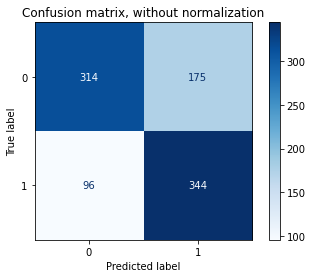

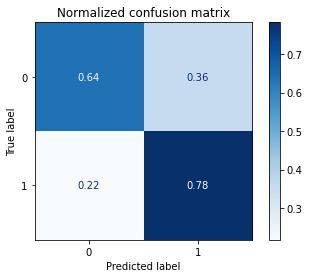

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       489
           1       0.66      0.78      0.72       440

    accuracy                           0.71       929
   macro avg       0.71      0.71      0.71       929
weighted avg       0.72      0.71      0.71       929



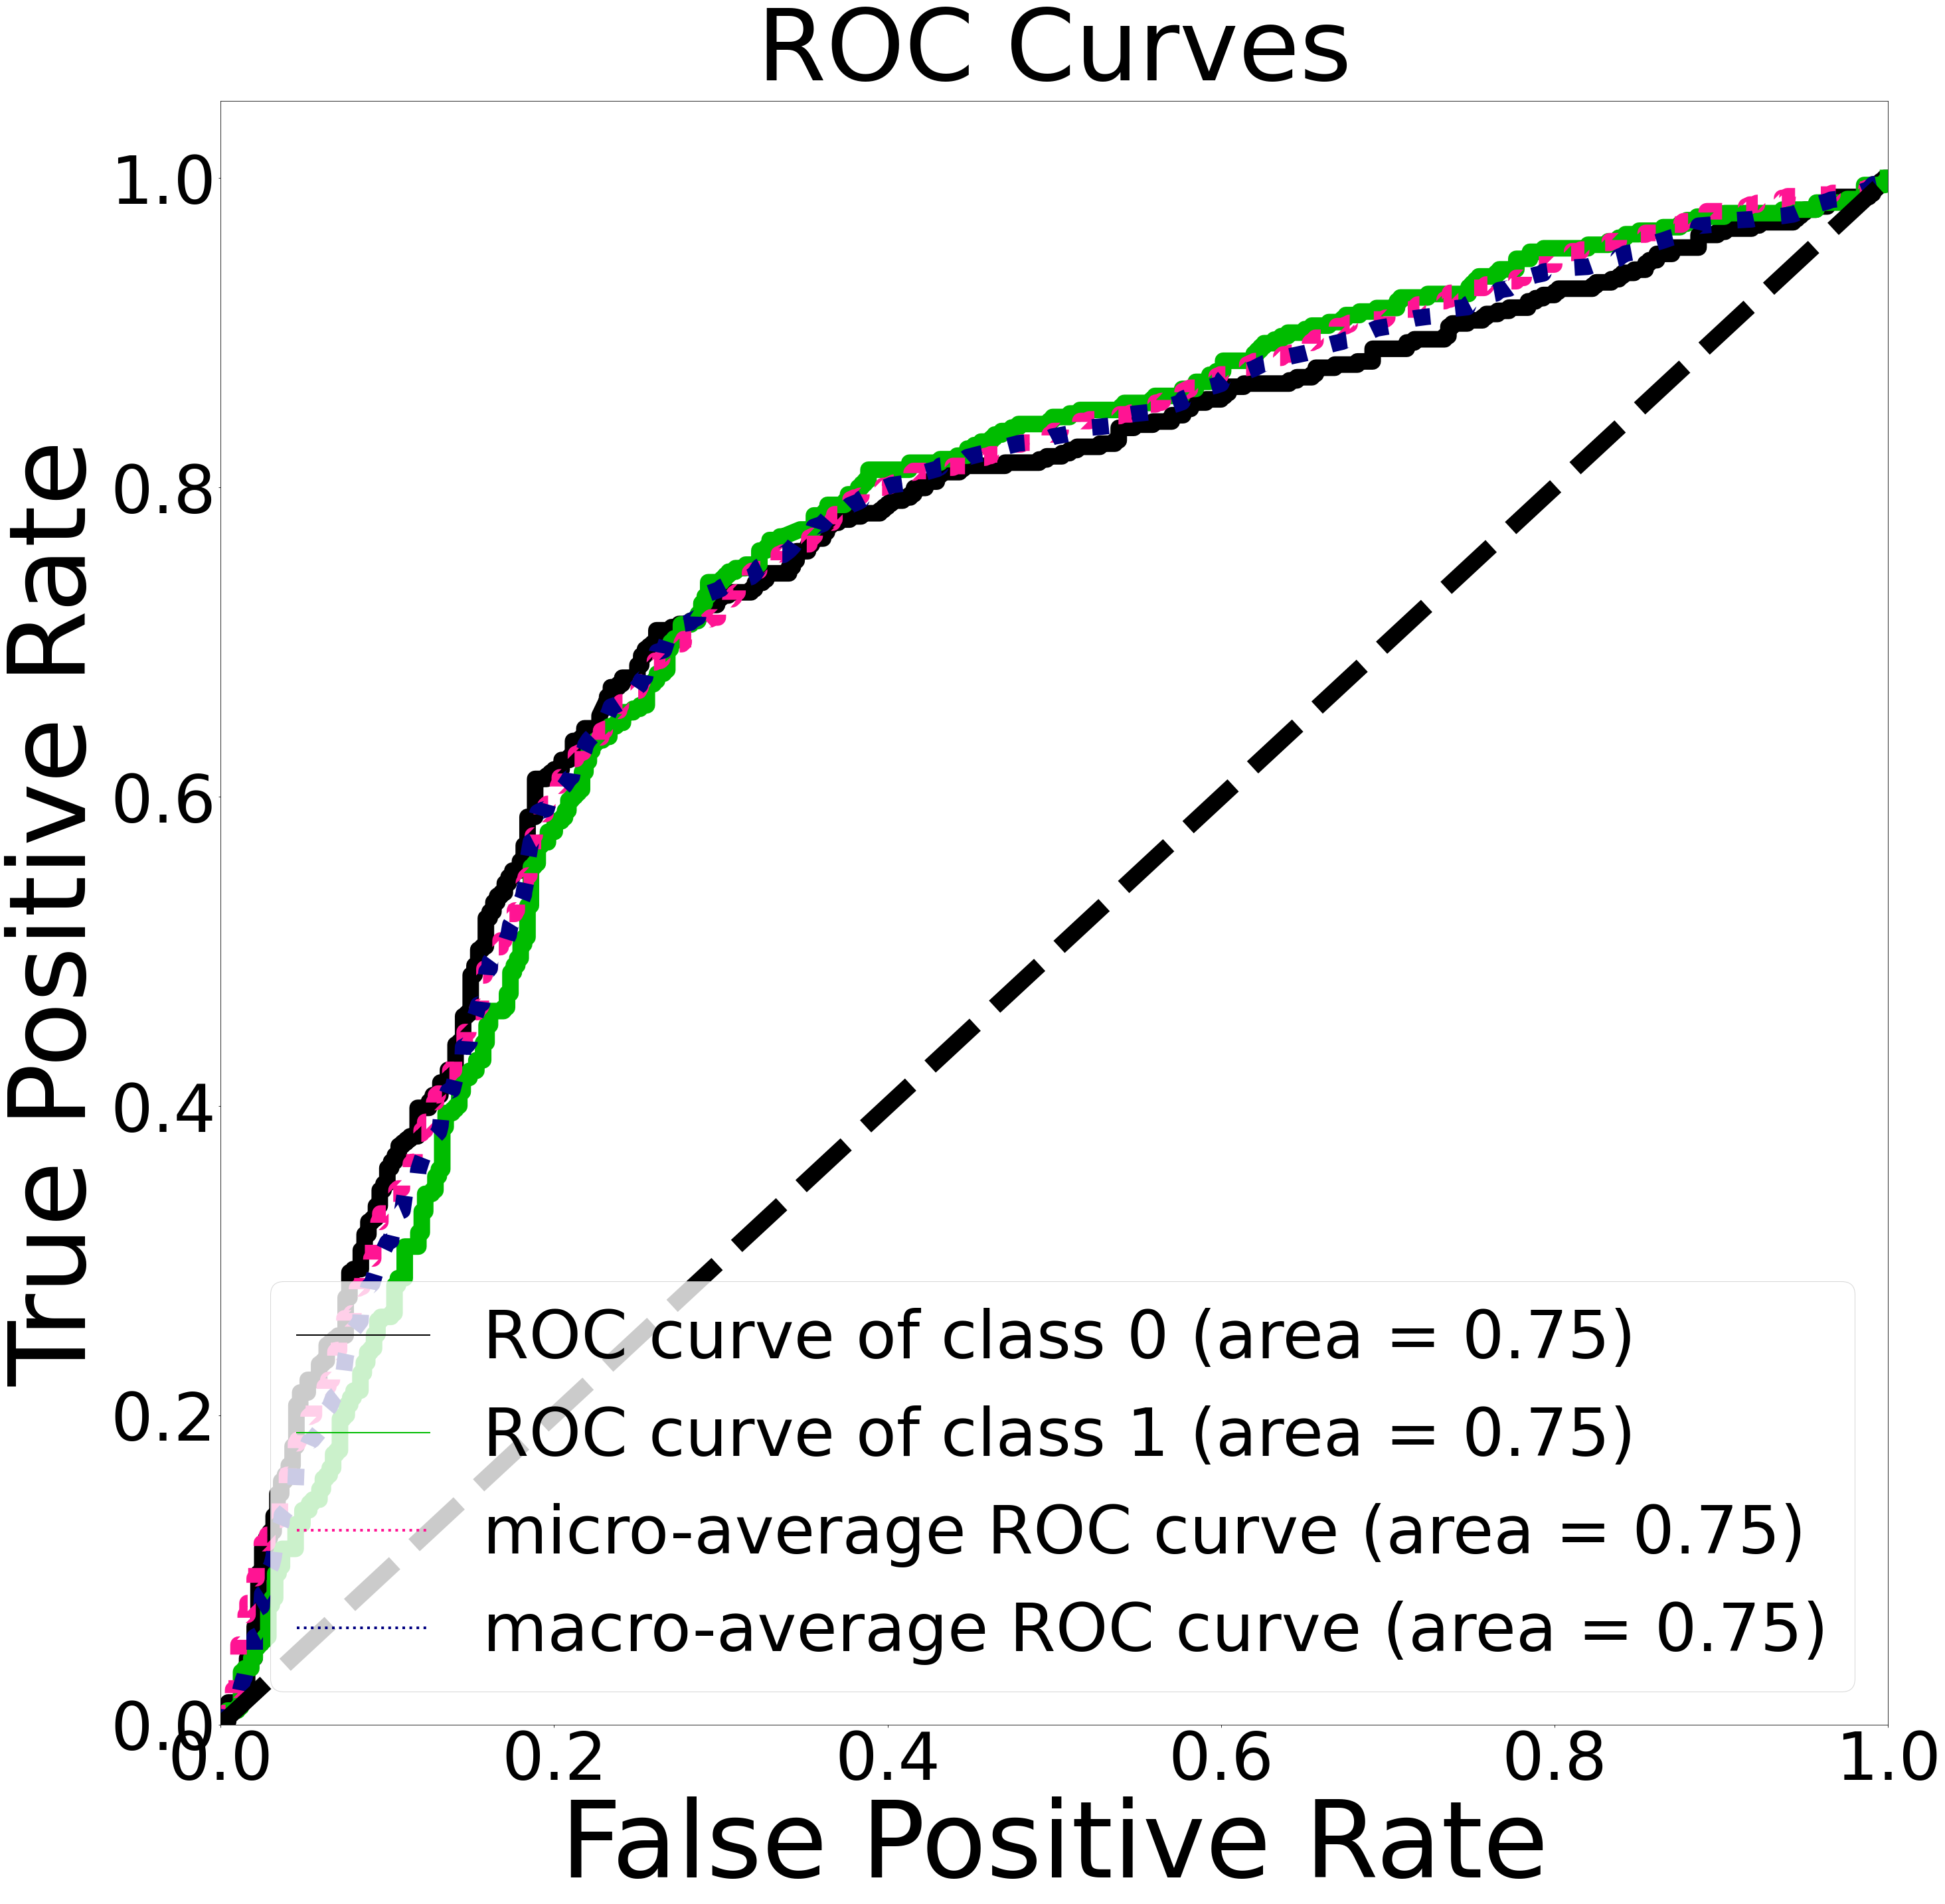

Average precision-recall score Random forest: 0.62


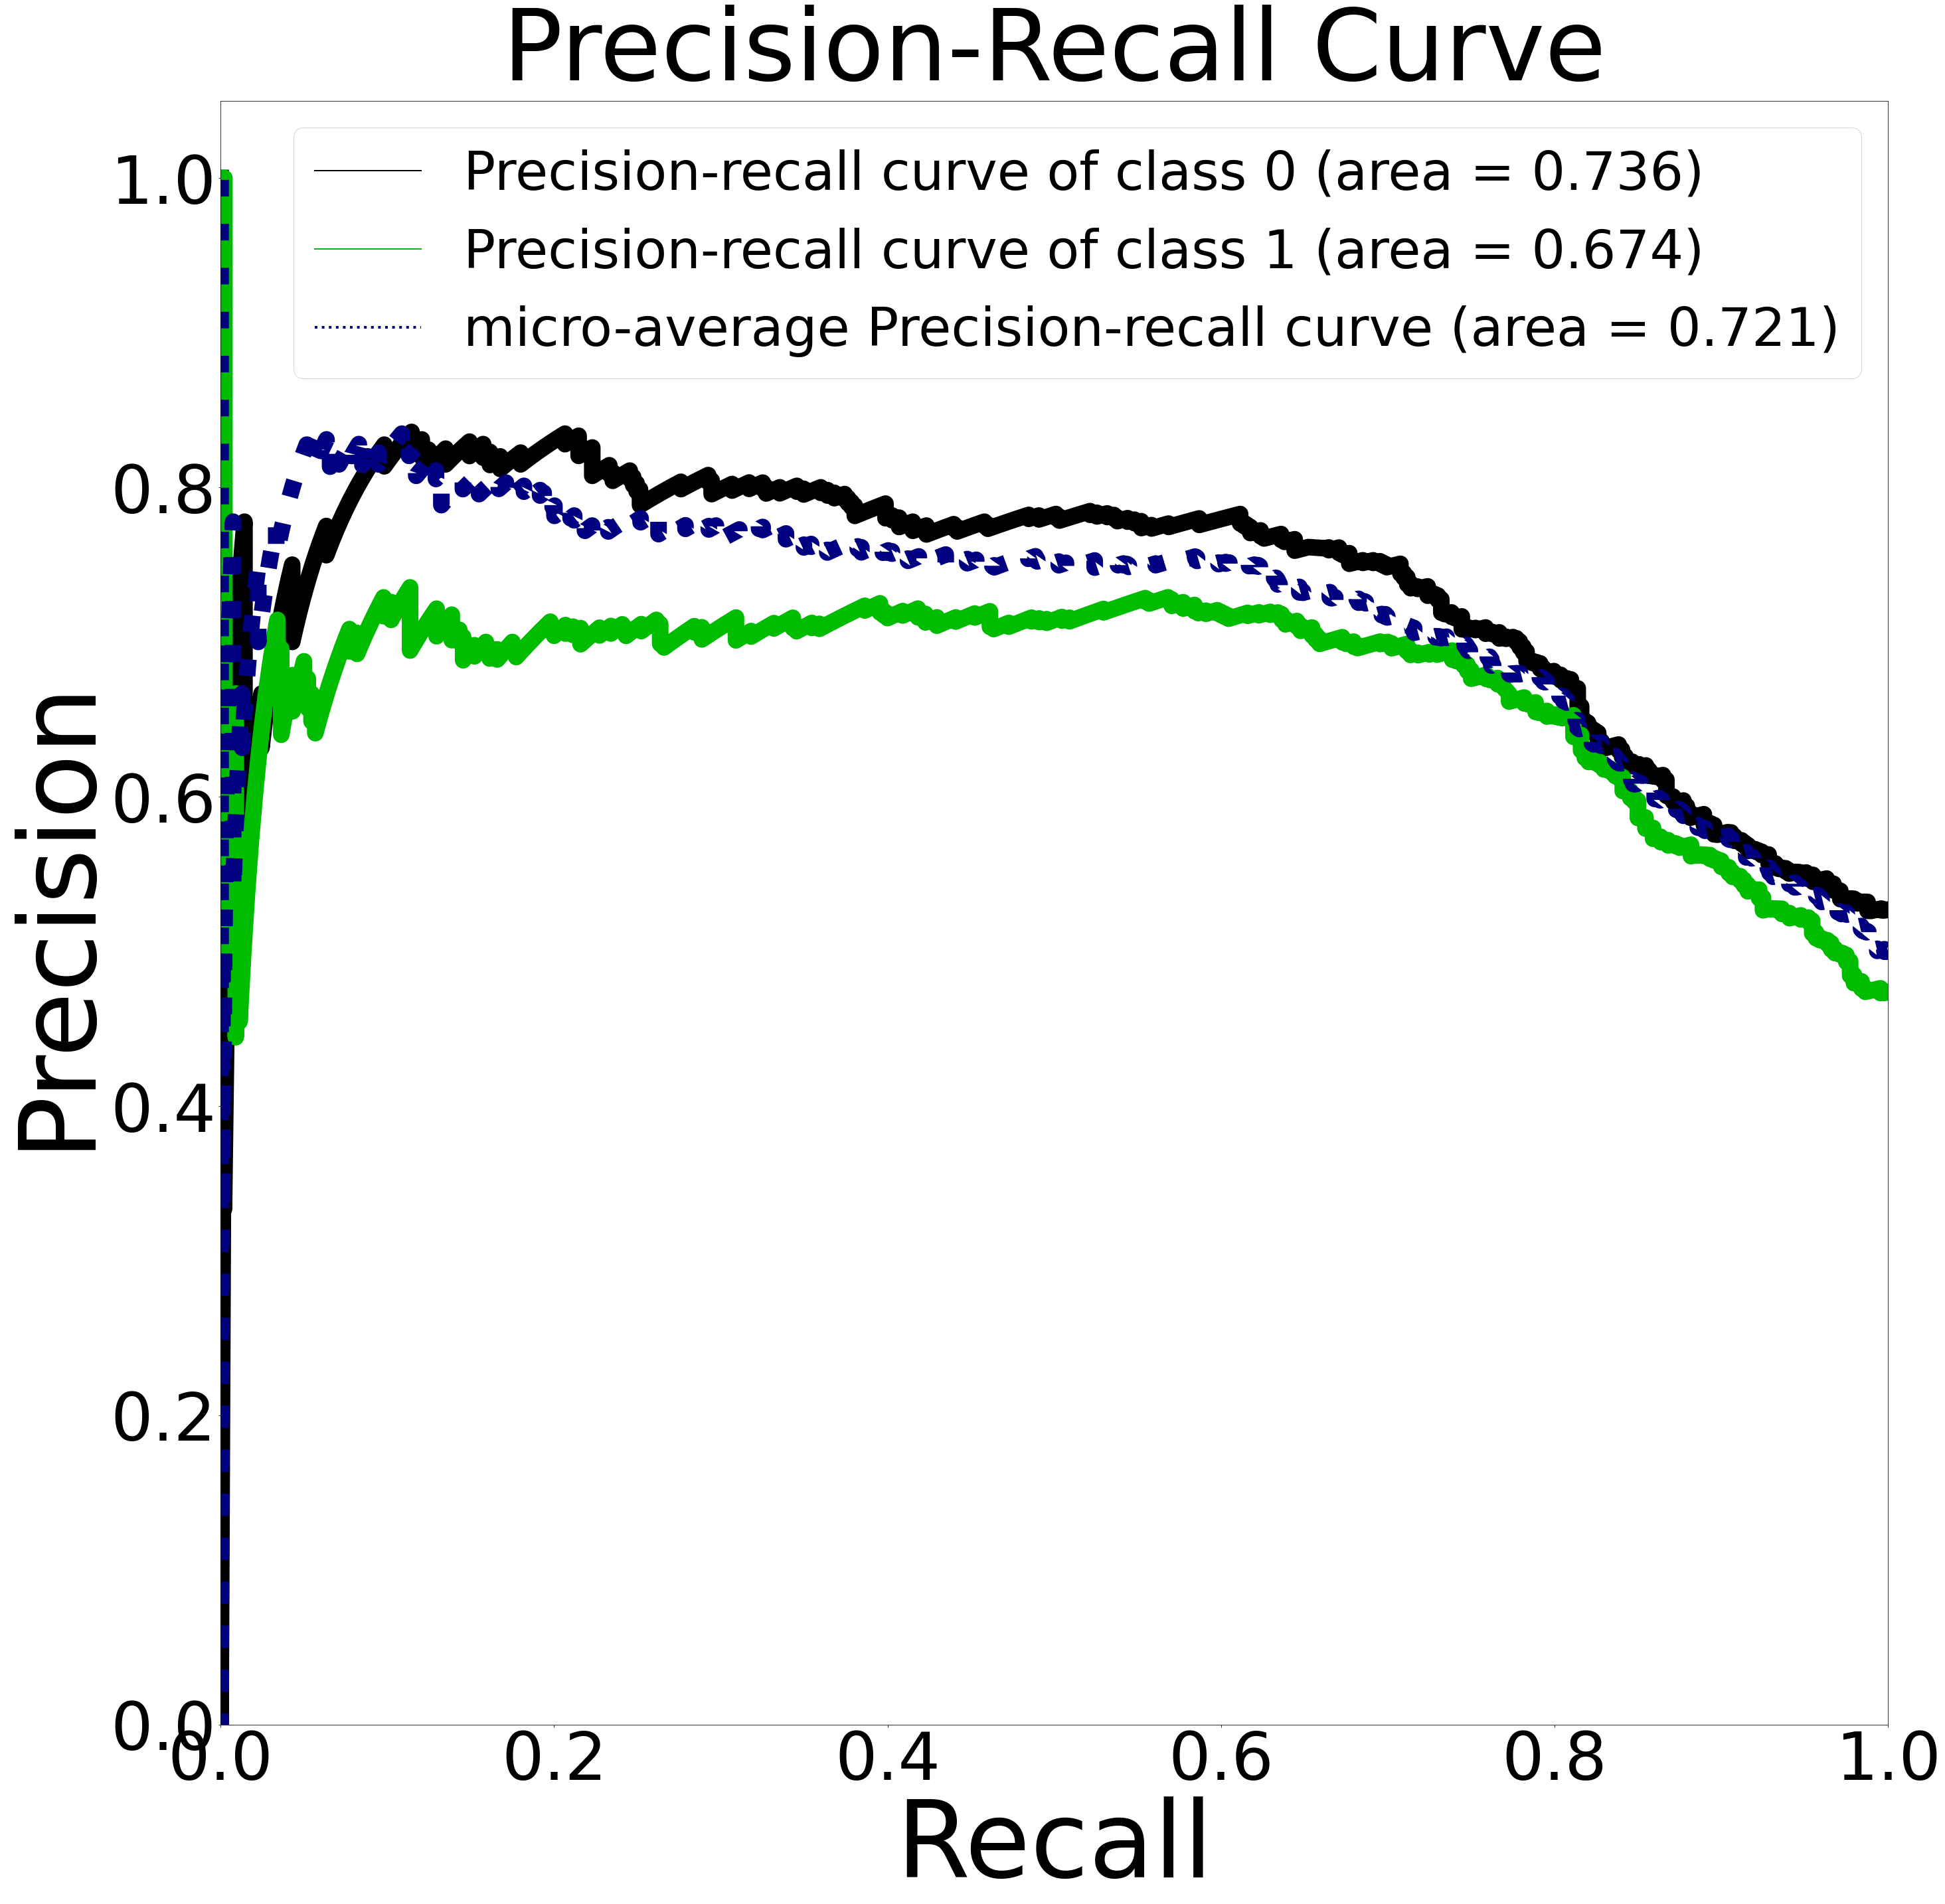

In [15]:
#SVM best Transforming method
print("As best score provided with Radial we will train it in the same.")
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_val)
print("Support vector machine accuracy Best Kernel score :" , accuracy_score(y_val, y_svm))
plot_graphs(clf,X_val,y_val, y_svm)

In [12]:
#Neural Network Classifier Testing
neuro = MLPClassifier(learning_rate='constant',max_iter=1200)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for Constant Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='invscaling',max_iter=1200)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for invscaling Learning:" , accuracy_score(y_val, y_neuro))
neuro = MLPClassifier(learning_rate='adaptive',max_iter=1200)
neuro.fit(X_train, y_train)
y_neuro = 0
y_neuro = neuro.predict(X_val)
print("MLPC accuracy for adaptive Learning:" , accuracy_score(y_val, y_neuro))

MLPC accuracy for Constant Learning: 0.6135629709364908
MLPC accuracy for invscaling Learning: 0.6135629709364908
MLPC accuracy for adaptive Learning: 0.6060279870828849


Confusion matrix, without normalization
[[309 180]
 [157 283]]
Normalized confusion matrix
[[0.63190184 0.36809816]
 [0.35681818 0.64318182]]


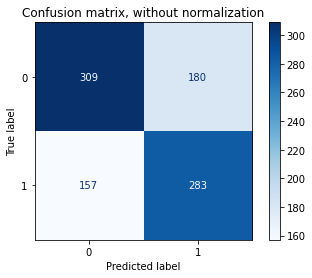

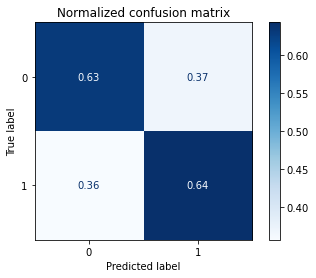

              precision    recall  f1-score   support

           0       0.66      0.63      0.65       489
           1       0.61      0.64      0.63       440

    accuracy                           0.64       929
   macro avg       0.64      0.64      0.64       929
weighted avg       0.64      0.64      0.64       929



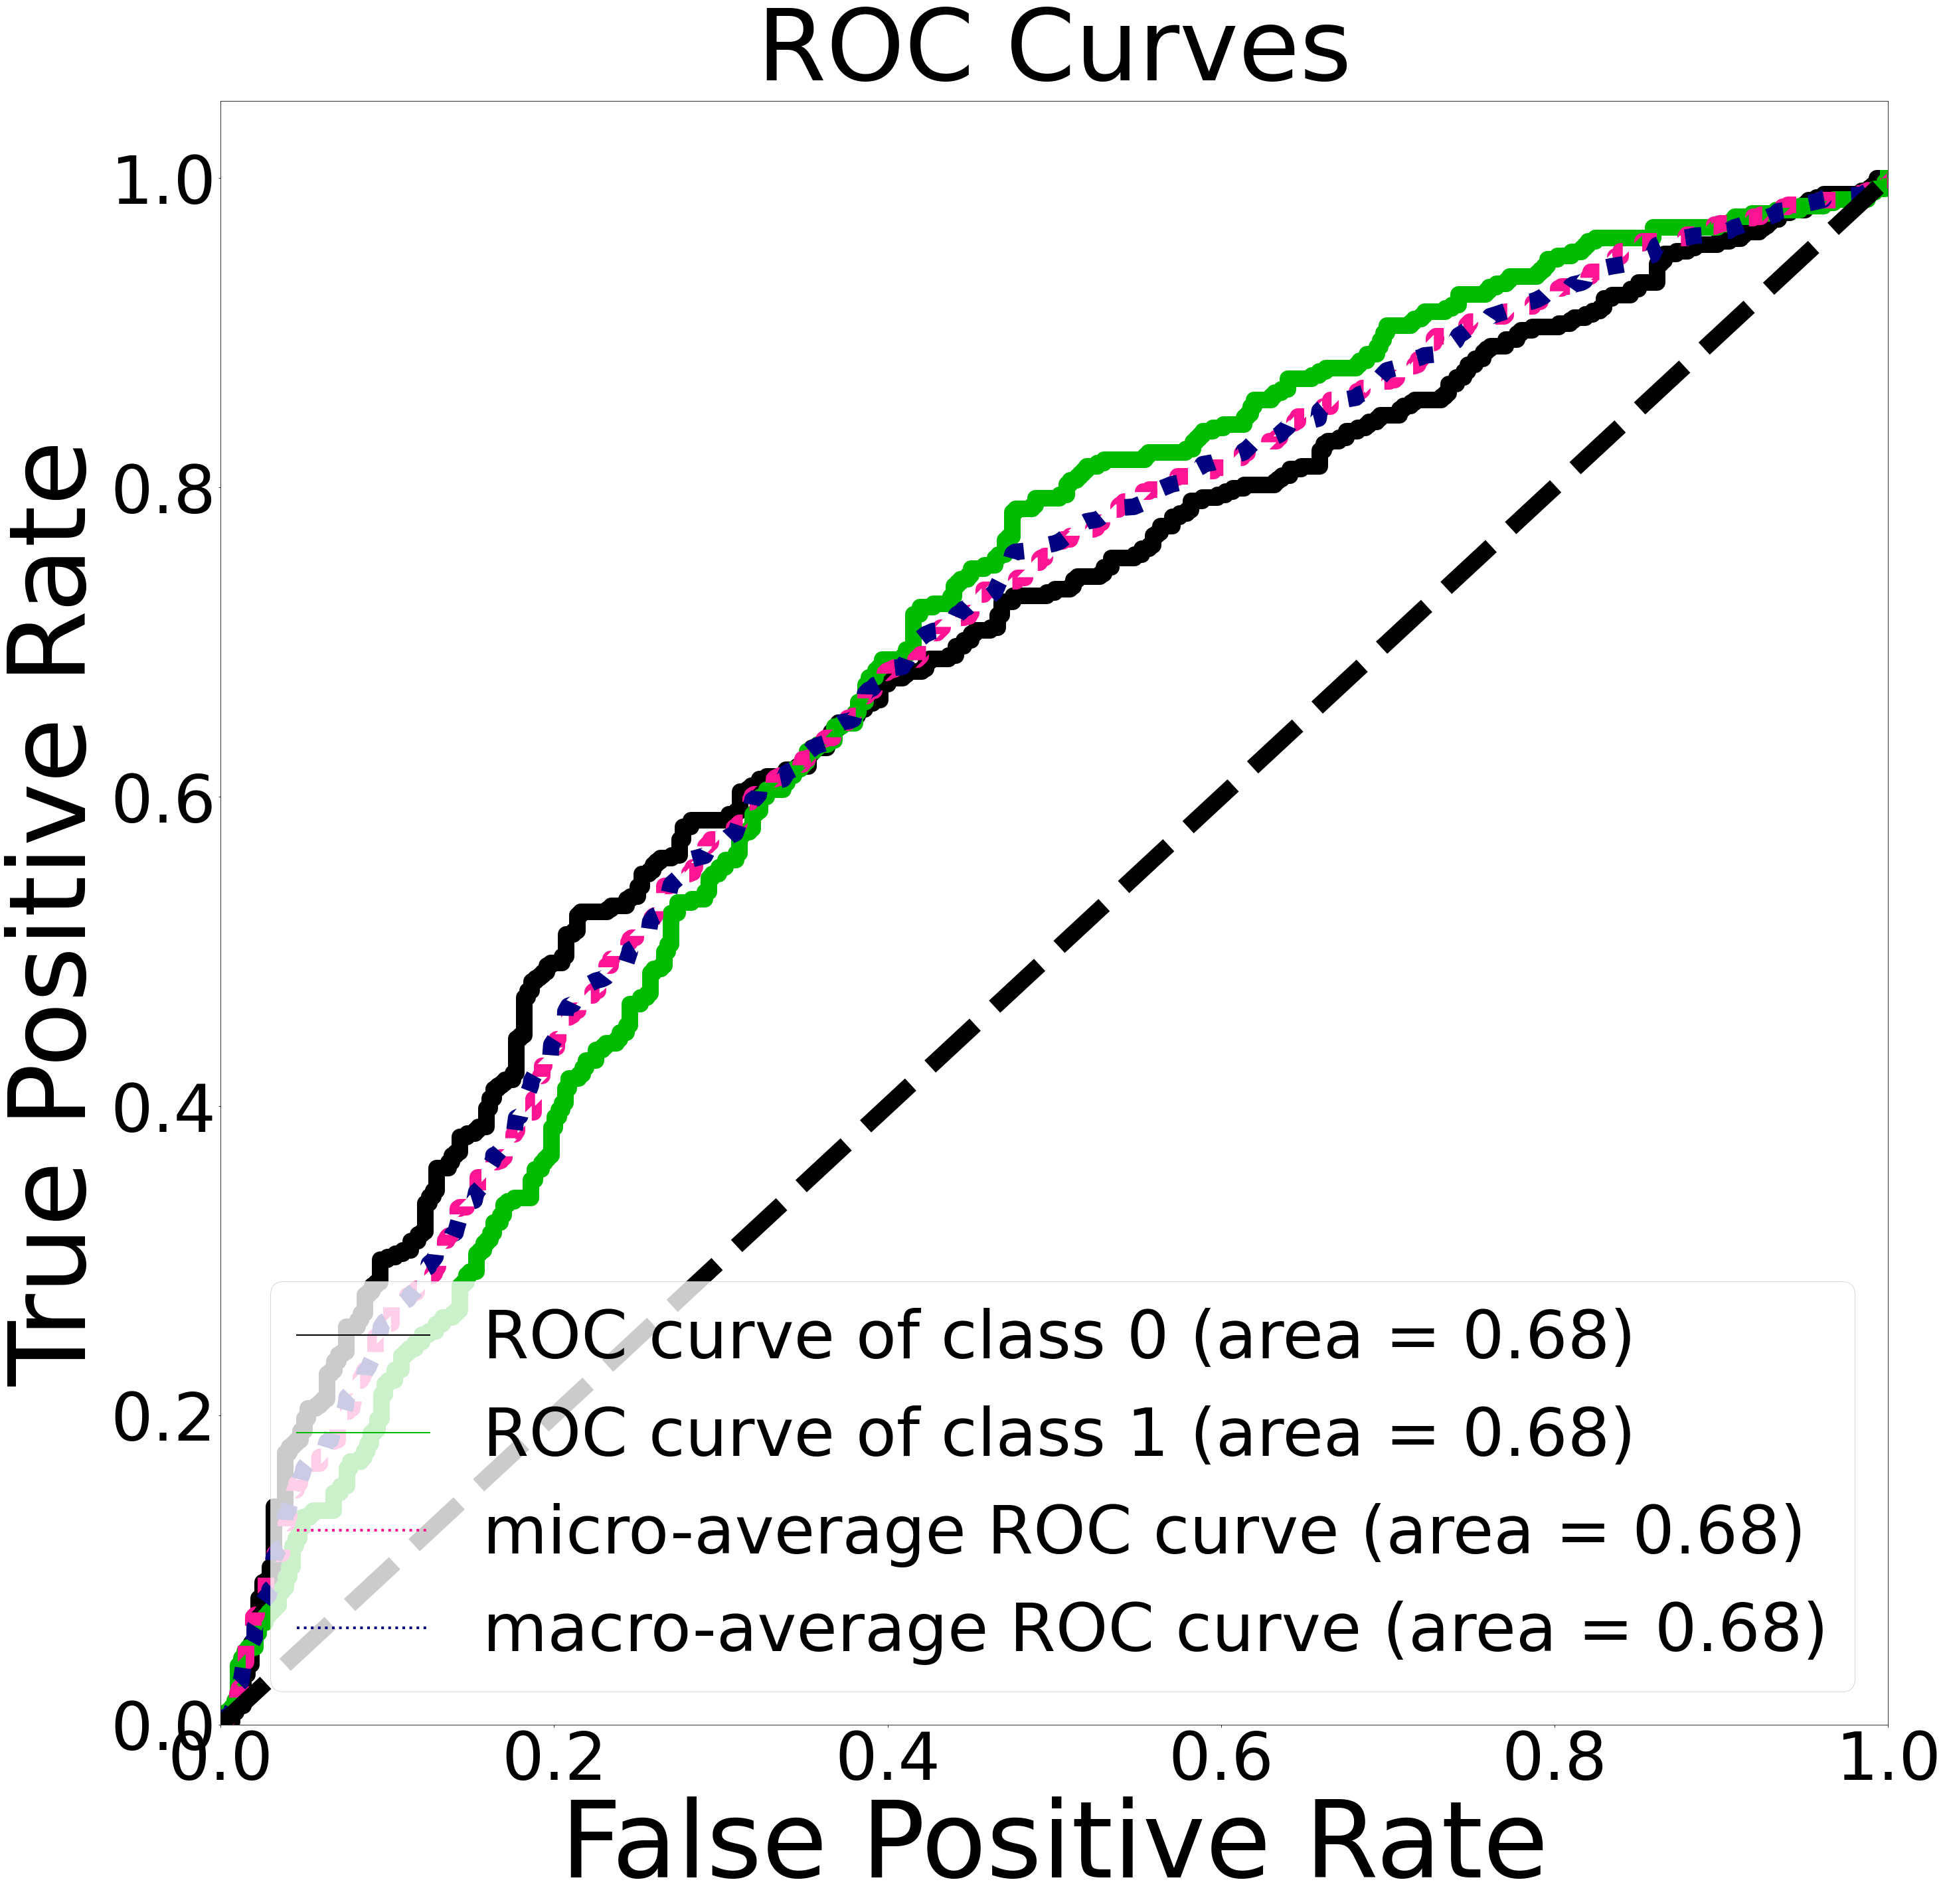

Average precision-recall score Random forest: 0.56


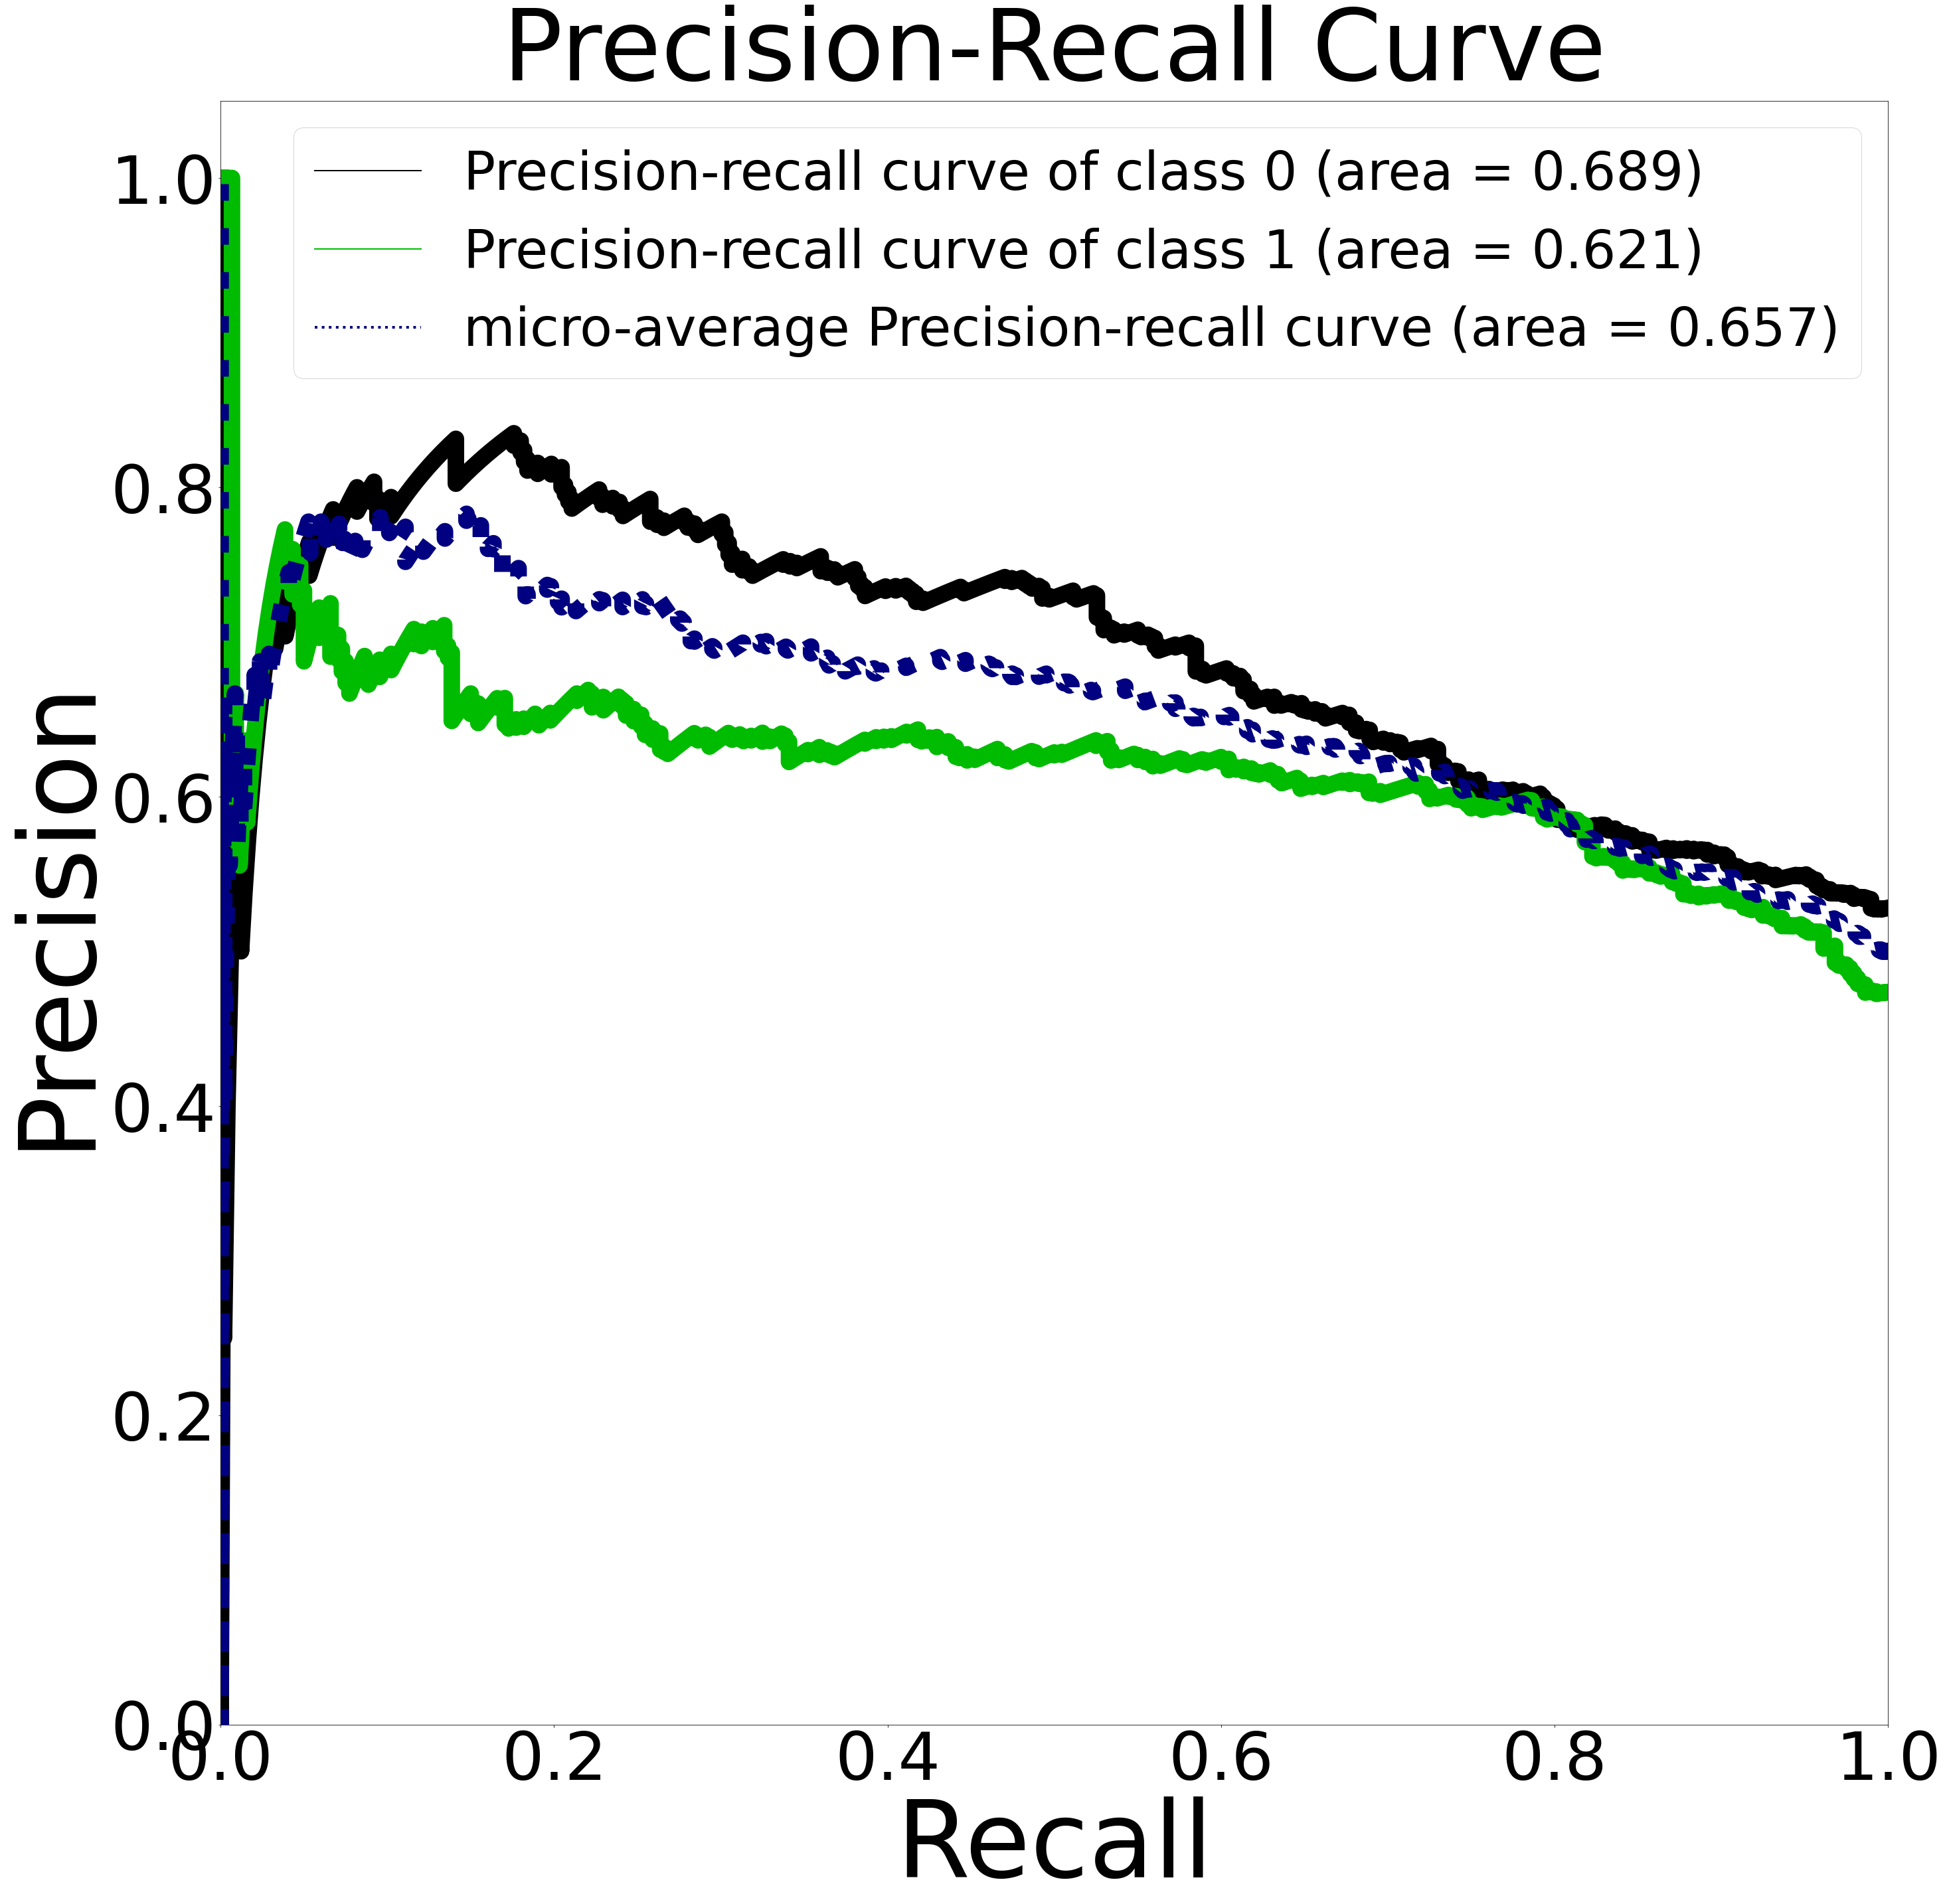

In [16]:
#Neural Network Classifier Best learning rate
neuro = MLPClassifier(learning_rate='constant',max_iter=1200)
neuro.fit(X_train, y_train)
y_neuro = 0
neuropredict = neuro.predict(X_val)
plot_graphs(neuro,X_val,y_val, neuropredict)